## SMS classification

In [1]:
#%pip install -r ./requirements.txt

In [2]:
import pandas as pd
df = pd.read_csv("spam.csv")
df = df[:500]
df.shape

(500, 2)

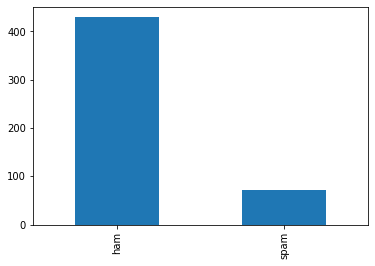

In [3]:
import matplotlib.pyplot as plt
df['Class'].value_counts().plot.bar()
plt.show()

## Clean Sentences

In [4]:
# Prepare cleaning functions
import re, string
import nltk
from nltk.stem import SnowballStemmer

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

stemmer = SnowballStemmer('english')

def preProcessText(text):
    # lowercase and strip leading/trailing white space
    text = text.lower().strip()
    
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    
    return text

def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

def cleanAllSentences(df):
    return [cleanSentence(item, stop_words, stemmer) for item in df.values]

In [5]:
df['Message'] = cleanAllSentences(df['Message'])

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Or you can use a tf-idf vectorizer 
# tfidf = TfidfVectorizer()

textvectorizer = CountVectorizer(binary=True)
df['Message'] = textvectorizer.fit_transform(df['Message'])

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [8]:
X_train = train_data['Message']
y_train = train_data['Class']

X_test = test_data['Message']
y_test = test_data['Class']

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_test, y_test)